<img style="float: right;" src="https://img.shields.io/badge/楼+-数据分析与挖掘项目挑战-orange.svg?logo=&longCache=true&style=flat-square"></img>

## 链家成都市区挂牌二手房分析

---

- 学员昵称：Luo2019
- 学员编号：726290

---

## 项目介绍
”衣食住行“是涉及到广大群众的基本生存基础，“衣”、“食”和“住”是属于大众的最基本消费，也是最常见的消费。“住”不属于大众的常见消费，但是随着社会变化，工作薪资等提升越来越多的人会选择通过购买住房而非出租的方式来解决“住”的问题。而同等时期条件下，二手房也越来越属于热门市场。因此选定了成都的[二手房](https://cd.lianjia.com/ershoufang/)作为数据源，以期能够初步了解二线城市中的二手房市场信息。

## 项目目录


### 数据采集 
本次项目是通过对[链家成都二手房](https://cd.lianjia.com/ershoufang/)数据进行采集分析，其中利用了 **Selenium** 进行动态模拟获取每个页面中挂牌房屋链接以及 **Requests**、**BeautifulSoup** 等方式来得到基本属性、交易属性以及销售信息。


<font color="red">
<b>注：</b>
    <ul>
        <li>爬虫文件进行了打包</li>
        <li> 需要下载 ChromeDriver，地址为 <a hrec="https://chromedriver.storage.googleapis.com/index.html?path=74.0.3729.6/">ChromeDriver 74.0.3729.6</a>，同时保存到 <code>/CrawlLianJia/tool</code> 路径下</li>
        <li>爬取的文件保存为了 <code>raw_data.json</code>，最终使用的文件为 <code>final.csv</code></li>
        <li>需要下载字体文件已用于创建子云，下载<a href="http://labfile.oss.aliyuncs.com/courses/1176/fonts.zip">字体</a>需要解压缩，保存到<code>其他文件</code>文件夹下<li>
    </ul>
</font>

In [ ]:
from CrawlLianJia import crawl

In [ ]:
# 爬虫已经封装好，可以直接运行， 可以不用运行
CHROME_DRIVER = "./CrawlLianJia/tool/chromedriver"
FILEPATH = "./raw_data.json"
crawl.main(CHROME_DRIVER, FILEPATH)

### 数据清理
通过上面的方式，每个挂牌二手房的数据都是以 `Json` 形式保存在文件中。相关的数据值都是以字符串的形式保存，需要将相应的数据进行预处理。同时检查是否存在缺失值、重复数据以及其他问题。

In [1]:
import pandas as pd
import numpy as np
import json
import re
import warnings

In [2]:
base_data = []
transaction_data = []
feature_data = []
with open("./raw_data.json", "r") as file:
    for line in file.readlines():
        base_data.append(json.loads(line)["base"])
        transaction_data.append(json.loads(line)["transaction"])
        feature_data.append(json.loads(line)["feature"])

In [3]:
base = pd.DataFrame(base_data)
transaction = pd.DataFrame(transaction_data)
feature = pd.DataFrame(feature_data)

In [4]:
raw_data = pd.merge(base, transaction, left_index=True, right_index=True)
raw_data = pd.merge(raw_data, feature, left_index=True, right_index=True)

In [5]:
# 检查数据是否存在重复
raw_data.duplicated().sum()

1

In [6]:
raw_data.drop_duplicates(inplace=True)

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2854 entries, 0 to 2854
Data columns (total 43 columns):
area            2854 non-null object
community_id    2854 non-null object
subInfo         2854 non-null object
total           2854 non-null object
unit            2854 non-null object
unitPrice       2854 non-null object
产权年限            2854 non-null object
别墅类型            11 non-null object
套内面积            2854 non-null object
小区名称            2854 non-null object
建筑类型            2843 non-null object
建筑结构            2854 non-null object
建筑面积            2854 non-null object
户型结构            2843 non-null object
房屋户型            2854 non-null object
房屋朝向            2854 non-null object
所在区域            2854 non-null object
所在楼层            2854 non-null object
梯户比例            2843 non-null object
燃气价格            9 non-null object
用水类型            10 non-null object
用电类型            10 non-null object
装修情况            2854 non-null object
配备电梯            2843 non-null object
链家编号          

In [8]:
raw_data.head(4).T

,0,1,2,3
area,80.66平米,119.6平米,94.31平米,104平米
community_id,1611063740530,1611061608941,1611041524496,1611062717746
subInfo,2016年建/板塔结合,2013年建/板塔结合,2002年建/板楼,2012年建/塔楼
total,95.8,310,138,145
unit,万,万,万,万
unitPrice,11878元/平米,25920元/平米,14633元/平米,13943元/平米
产权年限,70年,70年,70年,70年
别墅类型,NaN,NaN,NaN,NaN
套内面积,暂无数据,暂无数据,暂无数据,暂无数据
小区名称,地铁首座,银泰泰悦湾,翠堤春晓,御源大湖区


In [9]:
raw_data["可选交通数量"] = raw_data.交通出行.str.findall(r"地铁(\d+)|(\d+)号").str.len().fillna(0) + \
    raw_data.交通出行.str.findall(r"路").str.len().fillna(0)

In [10]:
raw_data.columns

Index(['area', 'community_id', 'subInfo', 'total', 'unit', 'unitPrice', '产权年限',
       '别墅类型', '套内面积', '小区名称', '建筑类型', '建筑结构', '建筑面积', '户型结构', '房屋户型', '房屋朝向',
       '所在区域', '所在楼层', '梯户比例', '燃气价格', '用水类型', '用电类型', '装修情况', '配备电梯', '链家编号',
       '上次交易', '交易权属', '产权所属', '房屋年限', '房屋用途', '房本备件', '抵押信息', '挂牌时间', '交通出行',
       '周边配套', '售房详情', '小区介绍', '户型介绍', '权属抵押', '核心卖点', '税费解析', '装修描述', '适宜人群',
       '可选交通数量'],
      dtype='object')

In [11]:
# 筛选出必要的数据
columns = [
    'area', 'community_id', 'subInfo', 'total', 'unitPrice', '产权年限',
    '小区名称', '建筑类型', "建筑结构", '户型结构', '房屋户型', "所在区域",
    "梯户比例", "交易权属", "房屋年限", "房屋用途", "挂牌时间", "抵押信息", "装修情况",
    "配备电梯", '链家编号', "上次交易", "核心卖点", '所在楼层', "装修描述", "可选交通数量"
]

In [12]:
df = raw_data.loc[:, columns].copy()
df.head(2)

,area,community_id,subInfo,total,unitPrice,产权年限,小区名称,建筑类型,建筑结构,户型结构,...,挂牌时间,抵押信息,装修情况,配备电梯,链家编号,上次交易,核心卖点,所在楼层,装修描述,可选交通数量
0,80.66平米,1611063740530,2016年建/板塔结合,95.8,11878元/平米,70年,地铁首座,板塔结合,钢混结构,平层,...,2019-05-04,有抵押 25万元 建设银行 业主自还,精装,有,106102556957,暂无数据,NaN,高楼层 (共32层),NaN,0.0
1,119.6平米,1611061608941,2013年建/板塔结合,310,25920元/平米,70年,银泰泰悦湾,板塔结合,钢混结构,平层,...,2019-01-25,有抵押 250万元 金融公司垫资,精装,有,106102100713,暂无数据,正对小区中庭，位置安静，正看小区绿化，带私家花园。,低楼层 (共31层),NaN,5.0


In [13]:
# 修改列名称
df.columns = ['总面积', '小区编号', '修建年份', '总价', '每平米价格', '产权年限',
              '小区名称', '建筑类型', '建筑结构', '户型结构', '房屋户型', '所在区域',
              '梯户比例', '交易权属', '房屋年限', '房屋用途', '挂牌时间', '抵押信息',
              '装修情况', '配备电梯', '链家编号', '上次交易', '核心卖点', '所在楼层',
              '装修描述', "可选交通数量"]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2854 entries, 0 to 2854
Data columns (total 26 columns):
总面积       2854 non-null object
小区编号      2854 non-null object
修建年份      2854 non-null object
总价        2854 non-null object
每平米价格     2854 non-null object
产权年限      2854 non-null object
小区名称      2854 non-null object
建筑类型      2843 non-null object
建筑结构      2854 non-null object
户型结构      2843 non-null object
房屋户型      2854 non-null object
所在区域      2854 non-null object
梯户比例      2843 non-null object
交易权属      2854 non-null object
房屋年限      2854 non-null object
房屋用途      2854 non-null object
挂牌时间      2854 non-null object
抵押信息      2854 non-null object
装修情况      2854 non-null object
配备电梯      2843 non-null object
链家编号      2854 non-null object
上次交易      2854 non-null object
核心卖点      2723 non-null object
所在楼层      2854 non-null object
装修描述      676 non-null object
可选交通数量    2854 non-null float64
dtypes: float64(1), object(25)
memory usage: 602.0+ KB


* 因为**房屋类型**和**梯户比例**可以解析为相应的数字值，因此通过正则表达式的方式分别获取到对应的值。此外梯户比例的中文数据值需要转换为数字值
* **产权年限**中也是数字值和年份数据相结合数据，需要进行解析
* **总面积**添加了中文单位，需要删除
* **每平米价格**需要解析出数字
* **所在区域**中分别包括了三个等级的信息，需要提取出需要的大区信息
* **抵押信息**中包括了详细的抵押说明，仅需要解析出是否存在抵押
* **所在楼层**需要解析出总楼层数和楼层位置
* **挂牌时间**,**修建年份** 需要分别解析为时间日期类型
* **上次交易** 是一个日期数据，其中`暂无数据`应当被替换为缺失值

In [15]:
df["房屋类型_室"] = df.房屋户型.str.findall(r"(\d+)室").str[0].astype("int16")
df["房屋类型_厅"] = df.房屋户型.str.findall(r"(\d+)厅").str[0].astype("int16")
df["房屋类型_厨"] = df.房屋户型.str.findall(r"(\d+)厨").str[0].astype("int16")
df["房屋类型_卫"] = df.房屋户型.str.findall(r"(\d+)卫").str[0].astype("int16")

In [16]:
num_dict = {
    '六': 6, '四': 4, '两': 2, '八': 8, '七': 7, '十六': 16, '五': 5, '十': 10,
    '十五': 15, '二十四': 24, '三': 3, '五十二': 52, '十三': 13, '九': 9, '二十二': 22,
    '十七': 17, '四十': 40, '二十一': 21, '三十二': 32, '十二': 12, '十四': 14, '二十': 20,
    '一': 1, '二十三': 23, '十八': 18, '四十一': 41, '十一': 11, '十九': 19, '三十五': 35,
    '三十四': 34, '二十六': 26, '三十六': 36, '二十九': 29, '六十九': 69, '四十九': 49,
    '四十二': 42, '四十八': 48, '二十五': 25, '四十六': 46, '三十八': 38, '二十七': 27,
    '八十六': 86, '四十三': 43, '四十五': 45, '三十': 30
}

In [17]:
df["户数"] = df.梯户比例.str.findall(r"梯(.+)户").str[0].map(num_dict)

In [18]:
df["梯数"] = df.梯户比例.str.findall(r"(.+)梯").str[0].map(num_dict)

In [19]:
df["产权年限"] = df.产权年限.str.findall(r"(\d+)").str[0].astype("category")

In [20]:
df["总面积"] = df.总面积.str.findall(r"([\d\.]+)").str[0].astype("float")

In [21]:
df["每平米价格"] = df.每平米价格.str.findall(r"[\d\.]+").str[0].astype("float")

In [22]:
df["所在城区"] = df.所在区域.str.split("|").str[0]

In [23]:
df["总价"] = df.总价.astype("float")

In [24]:
df["抵押信息"] = df.抵押信息.str.split(" ").str[0]

In [25]:
df["总楼层"] = df.所在楼层.str.findall("\d+").str[0].astype("int")
df["所在楼层"] = df.所在楼层.str.split(" ").str[0]

In [26]:
df["修建年份"] = pd.to_datetime(df.修建年份.str.findall(r"\d+").str[0])
df["挂牌时间"] = pd.to_datetime(df["挂牌时间"])

In [27]:
df["上次交易"] = pd.to_datetime(df.上次交易.replace("暂无数据", np.nan))

In [28]:
# 需要删除相应的列
df.drop(labels=['房屋户型', '所在区域', '梯户比例'], axis=1, inplace=True)

In [29]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['font.family'] = 'STHeiti'

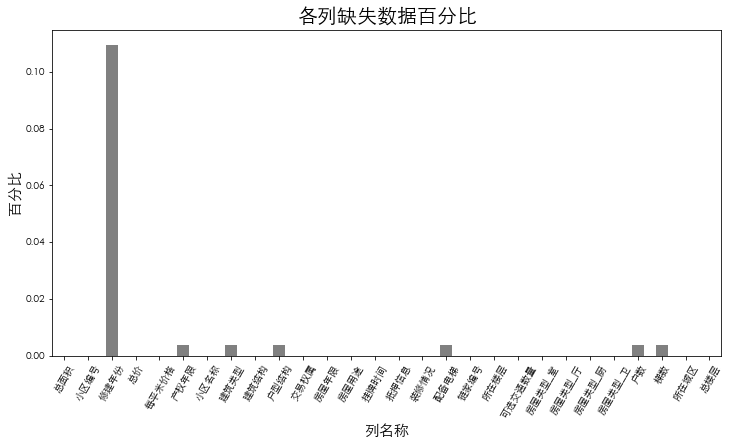

In [30]:
# 缺失值分别情况
_, ax = plt.subplots(figsize=(12, 6))
df[df.columns[~df.columns.isin(["装修描述", "核心卖点", "上次交易"])]].isnull().mean().plot(
    kind="bar", ax=ax, rot=60, color="grey")
ax.set_xlabel("列名称", fontsize=15)
ax.set_ylabel("百分比", fontsize=15)
ax.set_title("各列缺失数据百分比", fontsize=20)
plt.show()

### 缺失值处理
从上面可以看出主要的字段中，**修建年份**缺失比例最高（仅达到 $10\%$)，其他的缺失比例都是非常低。对相关列采取以下措施：
* 修建年份，通过整体的一个分布情况来判断采取相应的统计值进行填充
* 配备电梯，采用`暂无数据`进行填充
* 户型结构，采用`暂无数据`进行填充
* 建筑类型，采用`暂无数据`进行填充
* 梯数和户数，根据[梯户比说明(链家网)](https://news.lianjia.com/gz/baike/0295976.html)信息之后确认，可以通过房屋用途来确认属于哪个阶段的梯户比
* 产权年限，对于还是不能确定的数据采取删除的方式处理——没有一个良好方案进行相关数据处理，因而采取删除处理

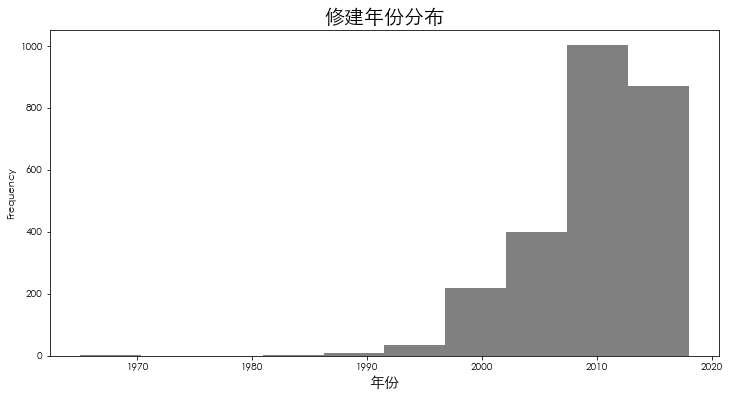

In [31]:
_, ax = plt.subplots(figsize=(12, 6))
df.修建年份.dt.year.plot(kind="hist", ax=ax, color="grey")
ax.set_xlabel("年份", fontsize=15)
ax.set_title("修建年份分布", fontsize=20)
plt.show()

从上图分布可以知道：
1. 在售二手房基本上都是 2009 年之后修建的，很少有上世纪修建的房屋在售
2. 因为是有一个左偏态分布数据，修建年份主要集中在 2010 年左右，因此使用该数据值众数进行填充

In [32]:
df["修建年份"] = df.修建年份.fillna(df.修建年份.mode())

In [33]:
df[["配备电梯", "户型结构", "建筑类型"]] = df.loc[:, [
    "配备电梯", "户型结构", "建筑类型"]].fillna("暂无数据")

In [34]:
raw_data.loc[df[["梯数", "户数"]].isnull().sum(axis=1) > 0, "房屋用途"]

1035    别墅
1038    别墅
1039    别墅
1040    别墅
1192    别墅
2022    别墅
2024    别墅
2032    别墅
2052    别墅
2067    别墅
2394    别墅
Name: 房屋用途, dtype: object

经检验可以看出，**梯数**和**户数**是缺失的条件下，**房屋用途**是别墅。根据链家对梯户数比例的解释，可以知道，该类型的房屋的梯户数比例都属于低比例的情况。因此新建一个**梯户比**进行分类为`小`和`高`（大于 0.5 为高，反之为小），将缺失的数据填充`小`。

In [35]:
df["梯户比"] = (df.梯数 / df.户数).apply(lambda x: "高" if x > 0.5 else "低")

In [36]:
# 删除产权年限缺失数据
df.dropna(subset=["产权年限"], inplace=True)

In [37]:
df.head(3).T

,0,1,2
总面积,80.66,119.6,94.31
小区编号,1611063740530,1611061608941,1611041524496
修建年份,2016-01-01 00:00:00,2013-01-01 00:00:00,2002-01-01 00:00:00
总价,95.8,310,138
每平米价格,11878,25920,14633
产权年限,70,70,70
小区名称,地铁首座,银泰泰悦湾,翠堤春晓
建筑类型,板塔结合,板塔结合,板楼
建筑结构,钢混结构,钢混结构,钢混结构
户型结构,平层,平层,平层


### 数据处理
* 对交易时间可以进行分析，得到上次交易于挂牌之间的间隔时间

In [38]:
df["交易间隔天数"] = (df["挂牌时间"] - df["上次交易"]).fillna(pd.Timedelta(0, "D")).dt.days

### 二手房数据分析
为了了解成都二手房市场，挂牌房屋的基本情况。首先对二手房类型信息进行探索
1. 整体的二手房市场价格分布情况，面积分布以及单价分布
2. 挂牌二手房的属性信息，例如修建年份等

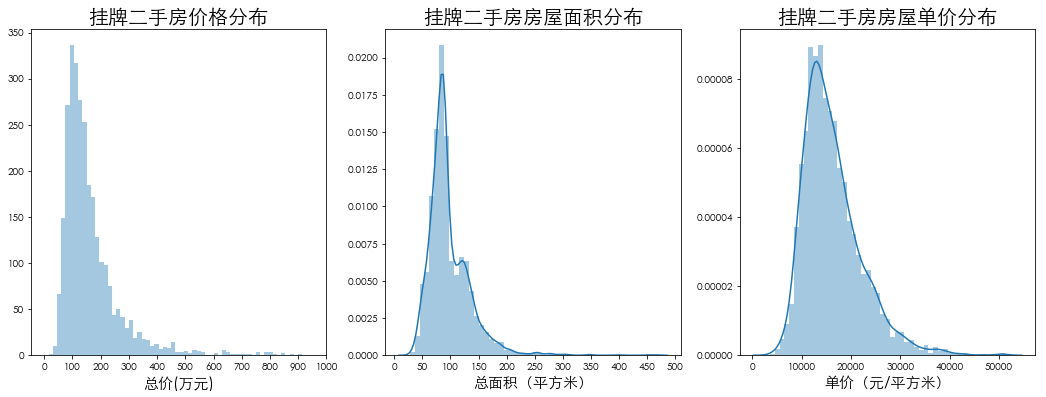

In [39]:
# plt.figure(figsize=(12, 6))
# df.总价.plot(kind="hist", ax=ax)
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

bin_edges = np.arange(0, df['总价'].max()+1, 15)
ax[0].hist(data=df, x='总价', bins=bin_edges, color="#A5C8E1")
xticks = np.arange(0, df.总价.max()+100, 100)
ax[0].set_xticks(ticks=xticks)
ax[0].set_xticklabels(labels=["%d" % i for i in xticks])
ax[0].set_xlabel("总价(万元)", fontsize=15)
ax[0].set_title("挂牌二手房价格分布", fontsize=20)
# 面积
sns.distplot(df.总面积, ax=ax[1])
ax[1].set_xlabel("总面积（平方米）", fontsize=15)
ax[1].set_title("挂牌二手房房屋面积分布", fontsize=20)
xticks = np.arange(0, df.总面积.max()+50, 50)
ax[1].set_xticks(ticks=xticks)
ax[1].set_xticklabels(labels=["%d" % i for i in xticks])

# 单价
sns.distplot(df.每平米价格, ax=ax[2])
ax[2].set_xlabel("单价（元/平方米）", fontsize=15)
ax[2].set_title("挂牌二手房房屋单价分布", fontsize=20)
# xticks = np.arange(0, df.每平米价格.max()+5000, 10000)
# ax[2].set_xticks(ticks=xticks)
# ax[2].set_xticklabels(labels=["%d" % i for i in xticks])
plt.show()

In [40]:
df.总价.max()

950.0

In [41]:
df.loc[df["总价"].idxmax()]

总面积                                 254.22
小区编号                         1611049015431
修建年份                   2013-01-01 00:00:00
总价                                     950
每平米价格                                37370
产权年限                                    70
小区名称                                中海城南华府
建筑类型                                    板楼
建筑结构                                  钢混结构
户型结构                                    平层
交易权属                                   商品房
房屋年限                                   满两年
房屋用途                                  普通住宅
挂牌时间                   2019-04-09 00:00:00
抵押信息                                   有抵押
装修情况                                    精装
配备电梯                                     有
链家编号                          106102425046
上次交易                   2016-02-24 00:00:00
核心卖点      南北通透 两梯两户 板式结构 套五三卫 精装修 空调加地暖满2年
所在楼层                                   高楼层
装修描述                                   NaN
可选交通数量                                   0
房屋类型_室     

In [42]:
df.loc[df.总面积.idxmax()]

总面积                              467
小区编号                   3011055396081
修建年份             2008-01-01 00:00:00
总价                               650
每平米价格                          13919
产权年限                              70
小区名称                           天鹅湖花园
建筑类型                              板楼
建筑结构                            钢混结构
户型结构                              平层
交易权属                             商品房
房屋年限                            未满两年
房屋用途                            普通住宅
挂牌时间             2017-08-07 00:00:00
抵押信息                             无抵押
装修情况                              毛坯
配备电梯                               有
链家编号                    106100549829
上次交易             2017-11-09 00:00:00
核心卖点      通透格局 采光通风好。交通便利，干湿分离带入户花园。
所在楼层                             高楼层
装修描述                             NaN
可选交通数量                             0
房屋类型_室                             4
房屋类型_厅                             2
房屋类型_厨                             2
房屋类型_卫                             1
户

In [43]:
df[["总价", "总面积", "每平米价格"]].skew()

总价       2.784066
总面积      2.298320
每平米价格    1.288503
dtype: float64

成都整体二手房市场中，挂牌价格整体上都是在 100 万元到 200 万元之间，同时存在少量的特别高价的房屋，最高的房价能达到 950 万元；同时面积上整体都集中在 $100\ {m^2}$ 左右，房屋面积最大为 $450\ m^2$；在单价方面，也是右偏态的分布图，主要的单价都是在 $10,000 元/m^2$ 到 $25,000元/m^2$ 之间

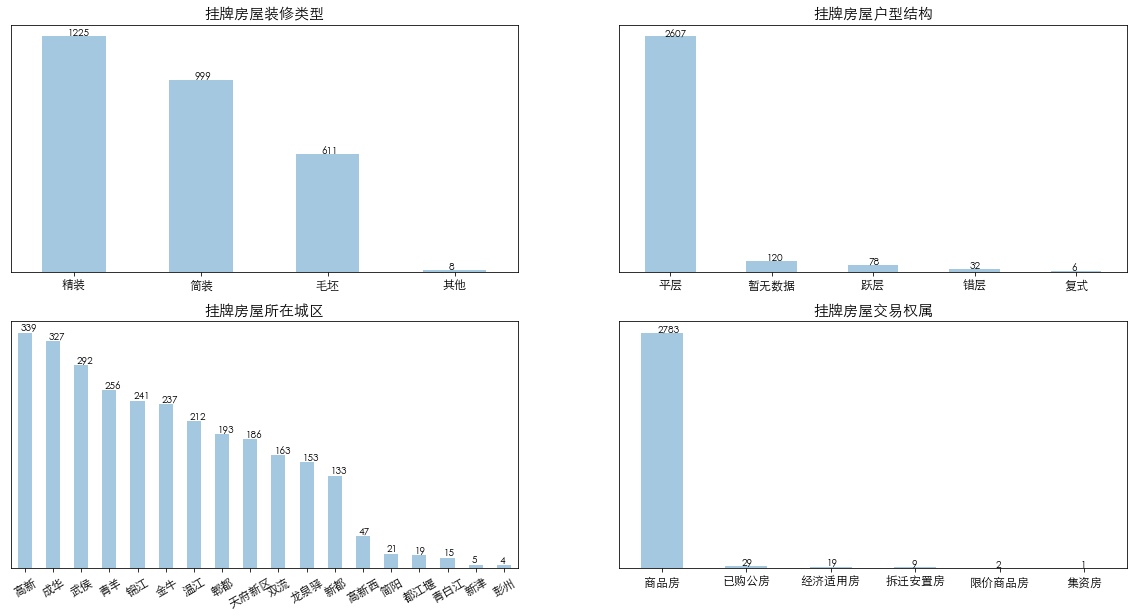

In [44]:
_, ax = plt.subplots(2, 2, figsize=(20, 10))

df["装修情况"].value_counts(dropna=False).plot(
    kind="bar", ax=ax[0][0], rot=0, color="#A5C8E1", fontsize=12)
ax[0][0].set_yticklabels("")
# ax.set_axis_off()
for index, value in enumerate(df["装修情况"].value_counts(dropna=False)):
    ax[0][0].text(x=index-.05, y=value+2, s=value, fontdict={"size": 10})
ax[0][0].set_title("挂牌房屋装修类型", fontsize=15)
ax[0][0].axes.tick_params(labelleft=False, left=False)

df["户型结构"].value_counts(dropna=False).plot(
    kind="bar", ax=ax[0][1], rot=0, color="#A5C8E1", fontsize=12)
ax[0][1].set_yticklabels("")
# ax.set_axis_off()
for index, value in enumerate(df["户型结构"].value_counts(dropna=False)):
    ax[0][1].text(x=index-.05, y=value+2, s=value, fontdict={"size": 10})
ax[0][1].set_title("挂牌房屋户型结构", fontsize=15)
ax[0][1].axes.tick_params(labelleft=False, left=False)

df["所在城区"].value_counts(dropna=False).plot(
    kind="bar", ax=ax[1][0], rot=30, color="#A5C8E1", fontsize=12)
ax[1][0].set_yticklabels("")
# ax.set_axis_off()
for index, value in enumerate(df["所在城区"].value_counts(dropna=False)):
    ax[1][0].text(x=index-.15, y=value+2, s=value, fontdict={"size": 10})
ax[1][0].set_title("挂牌房屋所在城区", fontsize=15)
ax[1][0].axes.tick_params(labelleft=False, left=False)

df["交易权属"].value_counts(dropna=False).plot(
    kind="bar", ax=ax[1][1], rot=0, color="#A5C8E1", fontsize=12)
ax[1][1].set_yticklabels("")
# ax.set_axis_off()
for index, value in enumerate(df["交易权属"].value_counts(dropna=False)):
    ax[1][1].text(x=index-.05, y=value+2, s=value, fontdict={"size": 10})
ax[1][1].set_title("挂牌房屋交易权属", fontsize=15)
ax[1][1].axes.tick_params(labelleft=False, left=False)

plt.show()

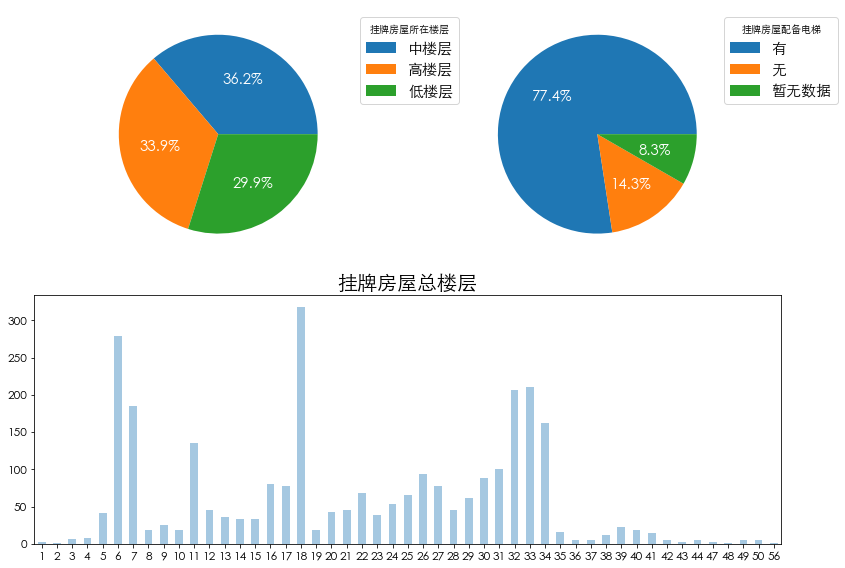

In [45]:
plt.close("all")
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot(212)
ax2 = plt.subplot(221)
ax3 = plt.subplot(222)


def func(pct):
    return "{0:.1f}%".format(pct)


data = df["所在楼层"].value_counts(dropna=False).values
labels = df["所在楼层"].value_counts(dropna=False).index
wedges, texts, autotexts = ax2.pie(x=data, autopct=lambda pct: func(pct),
                                   textprops=dict(color="w", size=15))
ax2.legend(wedges, labels, title="挂牌房屋所在楼层", loc="best",
           bbox_to_anchor=(1, 0, 0.5, 1), fontsize=15)

df["总楼层"].value_counts(dropna=False).sort_index().plot(kind="bar", ax=ax1,
                                                       rot=0, color="#A5C8E1", fontsize=12)
# sns.distplot(df["总楼层"].value_counts(dropna=False).sort_index(), ax=ax1)
ax1.set_title("挂牌房屋总楼层", fontsize=20)


def func(pct):
    if pct < 5:
        return ""
    else:
        return "{0:.1f}%".format(pct)


data = df["配备电梯"].value_counts(dropna=False).values
labels = df["配备电梯"].value_counts(dropna=False).index
wedges, texts, autotexts = ax3.pie(x=data, autopct=lambda pct: func(pct),
                                   textprops=dict(color="w", size=15))
ax3.legend(wedges, labels, title="挂牌房屋配备电梯", loc="best",
           bbox_to_anchor=(1, 0, 0.5, 1), fontsize=15)

plt.tight_layout()

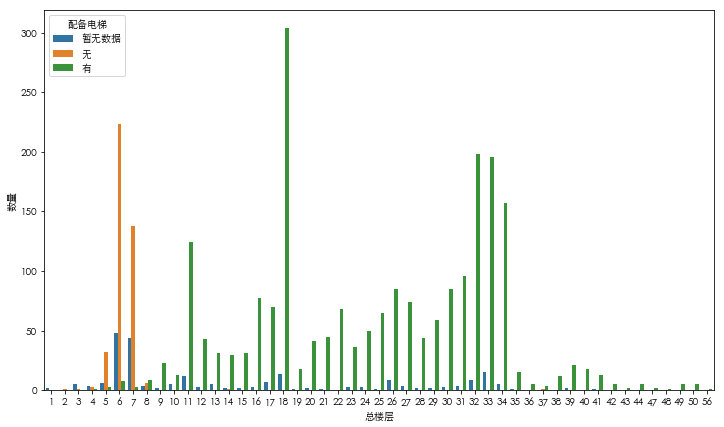

In [46]:
data = df.groupby(["总楼层", "配备电梯"], as_index=False, group_keys=False).size() \
    .reset_index().rename({0: "数量"}, axis=1)

plt.figure(figsize=(12, 7))
sns.barplot(x="总楼层", y="数量", hue="配备电梯", data=data)
plt.show()

In [47]:
# 通过 kendall 相关系数来验证两者的相关性
df[["配备电梯", "总楼层"]].corr("kendall")

,总楼层
总楼层,1.0


* 从挂牌交易的二手房基本信息，可以了解到目前在**城区**销售的类型特色主要是**平层**的**商品房**，而且基本上都是进行了简单装修。在成都市周边县城中（例如`简阳`， `新津`以及`彭州`）共给数量偏少

* 挂牌的楼层中的结果可以看出，成都市区的房源大部分集中在三类——低层数（总楼层数在 6～7 层），中楼层数（总楼层数在 18 层），以及高楼层数（主要在 32～34 层之间）；大部分的在售房源都是配备了电梯，房源在所属楼层分布在三种不同的梯度中。从楼层和电梯配备情况，可以发现总楼层在 8 层以下（包括 8 层）的房源中都没有配备有电梯，而之后的房源中都又提供电梯——因此针对电梯配备的情况，根据楼层来进行处理

In [48]:
df["配备电梯"] = df.总楼层.apply(lambda x: "无" if x <= 8 else "有")

In [49]:
data = df.groupby(["所在城区"]).agg({"每平米价格": [np.max, np.min, np.mean]})
data.columns = ["最大单价", "最小单价", "平均单价"]

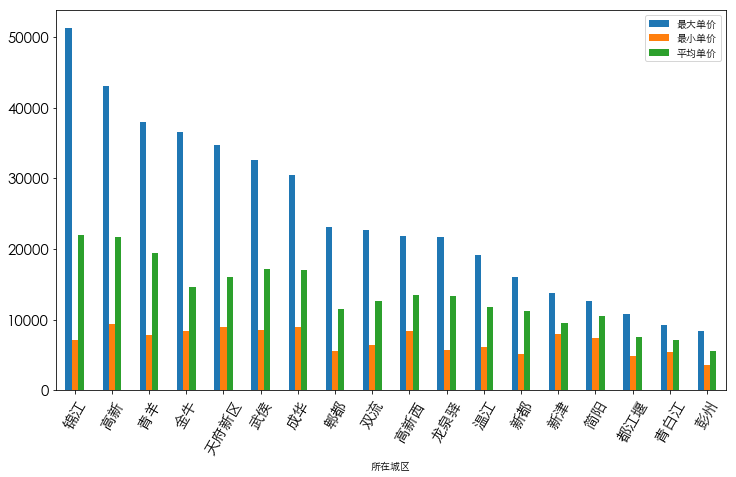

In [50]:
plt.figure(figsize=(12, 7))
ax = plt.gca()
data.sort_values("最大单价", ascending=False).plot(
    kind="bar", ax=ax, rot=60, fontsize=15)
plt.show()

各城区的最低单价价格总体比较稳定，但是最高单价则表现出市区中心总体偏高，其中 `郫都区`、`双流区`、`高新区`等在第二个梯度中符合各地区的经济情况。在平均单价方面，出现小幅度变化，特别是作为经济大区的`金牛区`表现出平均单价弱于后起之秀`天府新区`。整体来看，市区的房源具有高单价的占比

In [51]:
import jieba
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
from PIL import Image
from scipy.misc import imread

In [52]:
def load_stopwords(filename):
    with open(filename, "r") as file:
        stopwords = [line.strip('\n') for line in file.readlines()]
    return stopwords


stopwords = load_stopwords("./其他文件/stopwords.txt")

In [53]:
extra_stopwords = ["此房", "不错"]  # 检查是否有不必要词汇

In [54]:
words = []
for i in df["核心卖点"]:
    if pd.notna(i):
        for word in jieba.cut(i, cut_all=True):
            # 控制词汇长度，太短词汇没有太多意义
            if word not in stopwords + extra_stopwords and len(word) >= 2:
                words.append(word)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/2_/zx095sqs2_j3qw04zw6jglb00000gn/T/jieba.cache
Loading model cost 1.589 seconds.
Prefix dict has been built succesfully.


In [55]:
# 检验截取词汇是否可行
Counter(words).most_common(10)

[('户型', 1181),
 ('采光', 987),
 ('装修', 880),
 ('方正', 783),
 ('楼层', 745),
 ('视野', 571),
 ('两年', 539),
 ('阳台', 525),
 ('客厅', 398),
 ('房子', 391)]

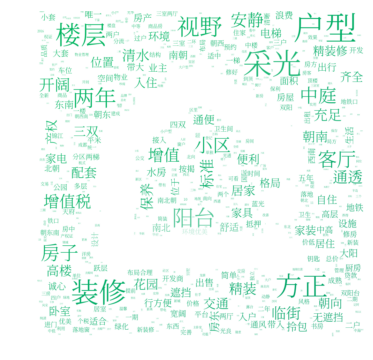

In [56]:
font = "./其他文件/fonts/SourceHanSerifK-Light.otf"
image = Image.open("./其他文件/lianjia_logo.jpeg")
img = np.array(image)

image_color = ImageColorGenerator(img)
# wordcloud.recolor(color_func=image_color)
wordcloud = WordCloud(font_path=font, background_color="white", max_words=1000,
                      max_font_size=100, random_state=42, margin=2, mask=img, color_func=image_color)

wordcloud.generate_from_frequencies(Counter(words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

In [57]:
extra_stopwords = ["装修", "房子"]

In [58]:
words = []
for i in df["装修描述"]:
    if pd.notna(i):
        for word in jieba.cut(i, cut_all=True):
            # 控制词汇长度，太短词汇没有太多意义
            if word not in stopwords + extra_stopwords and len(word) >= 2:
                words.append(word)

In [59]:
Counter(words).most_common(10)

[('保养', 255),
 ('家具', 234),
 ('入住', 233),
 ('家电', 218),
 ('业主', 144),
 ('自住', 132),
 ('拎包', 129),
 ('房东', 124),
 ('风格', 123),
 ('居家', 107)]

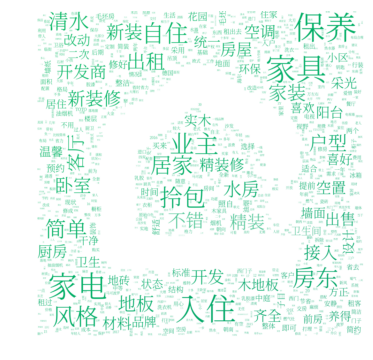

In [60]:
font = "./fonts/SourceHanSerifK-Light.otf"
image = Image.open("./lianjia_logo.jpeg")
img = np.array(image)

image_color = ImageColorGenerator(img)
wordcloud = WordCloud(font_path=font, background_color="white", max_words=1000,
                      max_font_size=100, random_state=42, margin=2, mask=img, color_func=image_color)

wordcloud.generate_from_frequencies(Counter(words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

从房源的描述信息和装修描述信息来看，**核心卖点**方面，销售人员会强调户型、楼层、阳台、客厅等信息，看来在描述卖点方面这些是买房者主要关注的信息；同时在**装修描述**方面，会强调装修效果，保养情况，是否可以直接入住等信息。总体来说，二手房的销售的影响因素还是包括了一般的信息，此外会强调以下装修效果，保养信息也是在销售中不错的一个措施

### 二手房价格建模
针对二手房价格进行建模，目标是想要确认房源的单位价值——即每平米价格。根据以上的分析，出去选择出部分字段作为分析的依据，包括：
* 装修情况
* 所在楼层
* 所在城区
* 房屋类型_室
* 房屋类型_厅
* 房屋类型_厨
* 房屋类型_卫 


In [61]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [62]:
columns = ["装修情况", "所在楼层", "所在城区", "房屋类型_室", "房屋类型_厅",
           "房屋类型_厨", "房屋类型_卫"]

X = df.loc[:, columns].copy()
# y = df["每平米价格"].copy()
low, high = np.percentile(df["每平米价格"], .25), np.percentile(df["每平米价格"], .75)
y = df["每平米价格"].apply(lambda x: "high" if x >=
                      high else ("low" if x <= low else "middle"))
y = LabelEncoder().fit_transform(y)

In [63]:
model = DecisionTreeRegressor(random_state=42)

params = {
    "max_depth": [4, 5, 8],
    "min_samples_split": [2, 3],
    "min_samples_leaf": [1, 2]
}

cv = GridSearchCV(model, param_grid=params)

In [64]:
for column in ["装修情况", "所在楼层", "所在城区"]:
    X[column] = LabelEncoder().fit_transform(X[column])

In [65]:
cv.fit(X, y)

/Users/renrui/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=42,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 5, 8], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
 

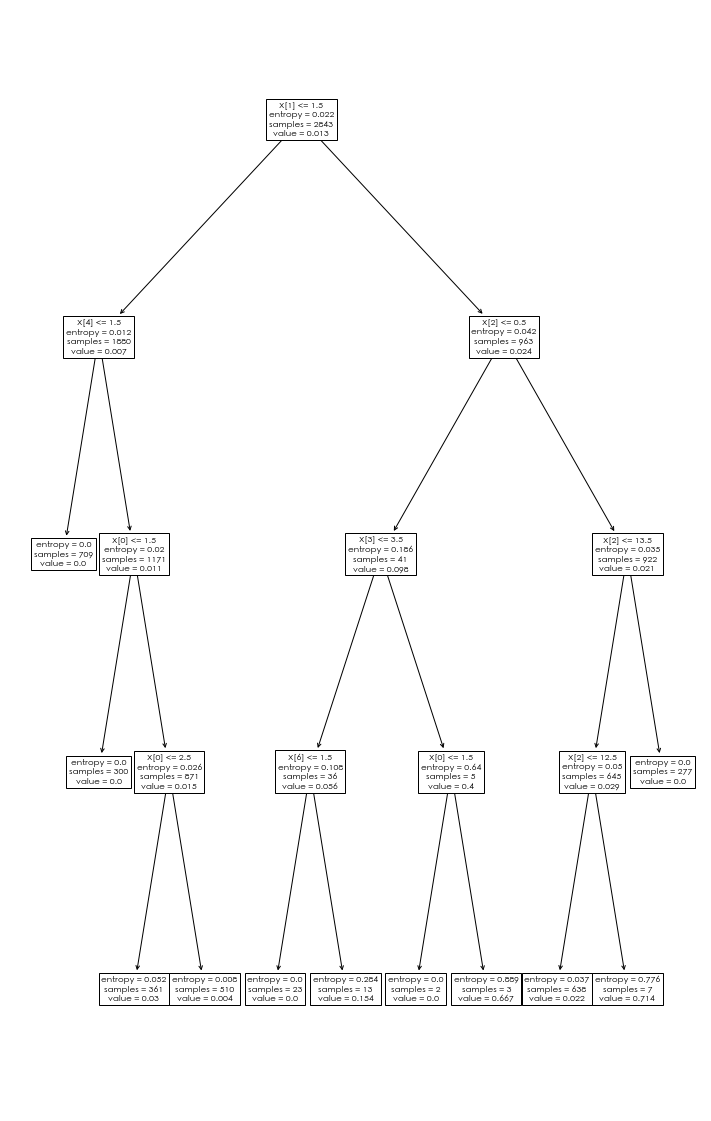

In [66]:
plt.figure(figsize=(12, 20))
ax = plt.gca()
plot_tree(cv.best_estimator_.fit(X, y), ax=ax)
plt.show()

### 分析总结
本次分析选择几个简单的角度分析了可能会影响房屋的价值——以每平米价格来分析。市中心是经济核心圈层，它的价值整体较高。在表现各自房屋的特色方面，没有很多独特的方面，主要还是以房性，装修等角度来表现二手房的特点。

## 总结
该项目只是一个初步探索，一方面因为数据容量较少，总共数量为两千多条；同时受数据容量的影响，在分析地区方面难以体现出相应的实际情况——可能解决方案，将其他平台（例如 58 同城）的数据进行整合。在模型建立方面，只是以简单从前期探讨的特征可能的影响来做了一个简单的决策树模型，以可视化的方式显示出不同价值级别数据判断路径。总体上，相关内容都还需要深入分析。